# High resolution imaging: 2MASS, PanSTARRS, K2

This notebook makes little postage stamps for evaluating contamination from stars, etc.

In [1]:
%%capture 
import lightkurve

In [2]:
# %load /Users/obsidian/Desktop/defaults.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import sys
import os

In [4]:
import aplpy

In [5]:
aplpy.__version__

'2.0rc2'

In [6]:
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import (PercentileInterval, SqrtStretch,
                                   ImageNormalize)
from astropy.io import fits
from astropy.wcs import WCS
import montage_wrapper as montage

In [7]:
from reproject import reproject_interp, reproject_exact

In [8]:
pos = SkyCoord(ra='08 51 13.354', dec='+11 51 40.15', unit=(u.hourangle, u.deg), frame='icrs')

### What high resolution imaging do we want?

| source | band | filename |
| -- | -- | -- |
| 2MASS | J | `data/imaging/2MASS/qJ_asky_971116n1210266.fits`|
| 2MASS | H | `data/imaging/2MASS/qH_asky_971116n1210266.fits`|
| 2MASS | K | `data/imaging/2MASS/qK_asky_971116n1210266.fits`|
| PanSTARRS | g | `data/imaging/PanSTARRS/MAST_2019-01-23T1325/PS1/rings.v3.skycell.1534.096.stk.g/rings.v3.skycell.1534.096.stk.g.unconv.fits`|

In [9]:
def make_postage_stamp(im_in, output, hdu=None, vmin=None, vmax=None):
    '''Make a postage stamp image'''
    fig = plt.figure(figsize=(3,3))
    if hdu is None:
        mosaic = aplpy.FITSFigure(im_in, north=True, figure = fig)
    else:
        mosaic = aplpy.FITSFigure(im_in,hdu=hdu, north=True, figure = fig)
    mosaic.recenter(pos.ra,pos.dec, radius=1.0/60.0/2.0)  # degrees
    if (vmin is not None) & (vmax is not None):
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear',
                              vmin=vmin, vmax=vmax)
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear',
                              vmin=vmin, vmax=vmax)        
    else:
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear')
        mosaic.show_grayscale(invert=True, interpolation='none', stretch='linear')
    mosaic.tick_labels.set_font(size='small')
    #mosaic.tick_labels.set_xformat("hh:mm:ss")
    mosaic.set_theme('publication')

    aplpy.AxisLabels(mosaic).hide()
    aplpy.TickLabels(mosaic).hide()

    mosaic.add_scalebar(10.0 * u.arcsecond)
    #fig.scalebar.show(1.0/3600.0*4.0)  # length in degrees
    #mosaic.scalebar.set_length(4.0 * u.arcsecond)
    mosaic.scalebar.set_label("$10^{\prime\prime}$")
    #mosaic.scalebar.set_corner('bottom right')
    mosaic.scalebar.set_color('red')
    mosaic.scalebar.set_linestyle('solid')
    mosaic.scalebar.set_linewidth(5)  # points
    mosaic.scalebar.set_font(size=12, weight='medium', \
                          stretch='normal', family='sans-serif', \
                          style='normal', variant='normal')

    mosaic.save(output, dpi=300)

### PanSTARRS $g$

In [10]:
im_in = '../data/imaging/PanSTARRS/MAST_2019-01-23T1325/PS1/rings.v3.skycell.1534.096.stk.g/rings.v3.skycell.1534.096.stk.g.unconv.fits'
output = 'S1063_60x60arcsec_PS1_g.png'

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -1.958e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.786e+00 [aplpy.core]
INFO: Auto-setting vmin to -1.906e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.378e+00 [aplpy.core]
CPU times: user 39.3 s, sys: 10.6 s, total: 49.9 s
Wall time: 32.6 s


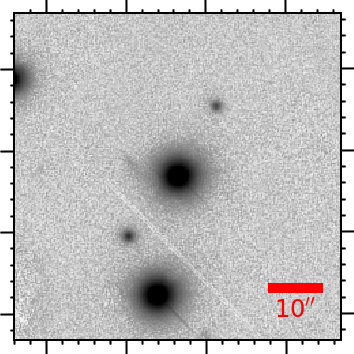

In [11]:
%%time
make_postage_stamp(im_in, output)

### 2MASS $J$ 

In [12]:
im_in = '../data/imaging/2MASS/qJ_asky_971116n1210266.fits'
output = 'S1063_60x60arcsec_2M_J.png'

INFO: Auto-setting vmin to  8.977e+01 [aplpy.core]
INFO: Auto-setting vmax to  3.224e+02 [aplpy.core]
INFO: Auto-setting vmin to  8.977e+01 [aplpy.core]
INFO: Auto-setting vmax to  3.224e+02 [aplpy.core]
CPU times: user 1.1 s, sys: 24.2 ms, total: 1.13 s
Wall time: 285 ms


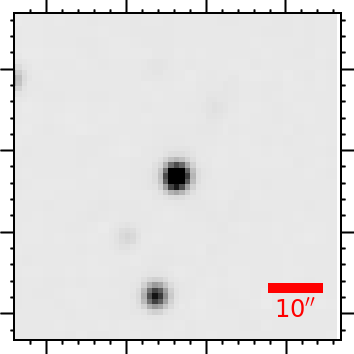

In [13]:
%%time
make_postage_stamp(im_in, output)

### K2 Campaign 5 FFI

In [14]:
tpf05 = lightkurve.KeplerTargetPixelFile('/Users/obsidian/.lightkurve-cache/mastDownload/K2/ktwo200008674-c05_lc/ktwo200008674-c05_lpd-targ.fits.gz')
tpf05.module, tpf05.output

(6, 1)

In [15]:
hdus_c5 = fits.open('/Volumes/Truro/ffi/ktwo2015127093352-c05_ffi-cal.fits', lazy_load_hdus=False)
hdu_c5_raw = hdus_c5['MOD.OUT 6.1'] # index 13

In [16]:
im_in = hdus_c5
output = 'S1063_60x60arcsec_K2_C5.png'

CPU times: user 3.37 s, sys: 174 ms, total: 3.54 s
Wall time: 1.48 s


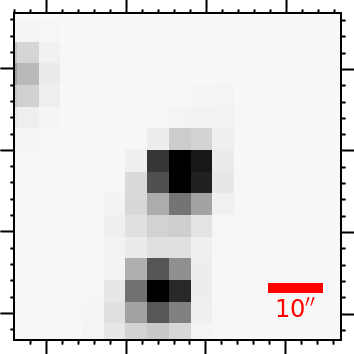

In [17]:
%%time
make_postage_stamp(im_in, output, hdu=13, vmin=30, vmax=8000)

### K2 Campaign 16 FFI

In [18]:
tpf16 = lightkurve.KeplerTargetPixelFile('/Users/obsidian/.lightkurve-cache/mastDownload/K2/ktwo200200534-c16_lc/ktwo200200534-c16_lpd-targ.fits.gz')
tpf16.module, tpf16.output

(15, 4)

In [19]:
hdus_c16 = fits.open('/Volumes/Truro/ffi/ktwo2017344214411-c16_ffi-cal.fits', lazy_load_hdus=False)
hdu_c16_raw = hdus_c16['MOD.OUT 15.4'] # index 52

In [20]:
! ls ../

LICENSE         code            document        notebooks       sf
README.md       data            environment.yml results


In [21]:
im_in = hdus_c16
output = 'S1063_60x60arcsec_K2_C16.png'

CPU times: user 3.64 s, sys: 203 ms, total: 3.84 s
Wall time: 1.5 s


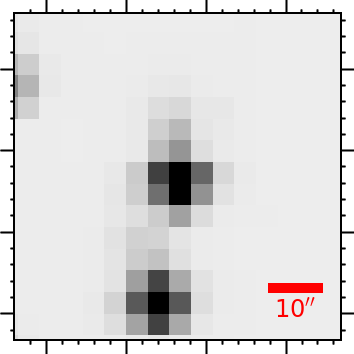

In [22]:
%%time
make_postage_stamp(im_in, output, hdu=52, vmin=30, vmax=8000)

In [23]:
! ls -t | head

S1063_60x60arcsec_K2_C16.png
high_res_imaging-aplply_v2p0.ipynb
S1063_60x60arcsec_K2_C5.png
S1063_60x60arcsec_2M_J.png
S1063_60x60arcsec_PS1_g.png
S1063_60x60arcsec_K2_C18.png
high_res_imaging.ipynb
high_res_imaging-aplply_v1p1.ipynb
M67_ffi_psf_c16.ipynb
M67_PSF.ipynb


### K2 Campaign 18 FFI

In [25]:
tpf18 = lightkurve.KeplerTargetPixelFile('/Users/obsidian/.lightkurve-cache/mastDownload/K2/ktwo200233338-c18_lc/ktwo200233338-c18_lpd-targ.fits.gz')
tpf18.module, tpf18.output

(6, 1)

In [26]:
hdus_c18 = fits.open('/Volumes/Truro/ffi/ktwo2018143080022-c18_ffi-cal.fits', lazy_load_hdus=False)
hdu_c18_raw = hdus_c18['MOD.OUT 6.1'] # index 52

In [27]:
im_in = hdus_c18
output = 'S1063_60x60arcsec_K2_C18.png'

CPU times: user 3.34 s, sys: 140 ms, total: 3.48 s
Wall time: 1.2 s


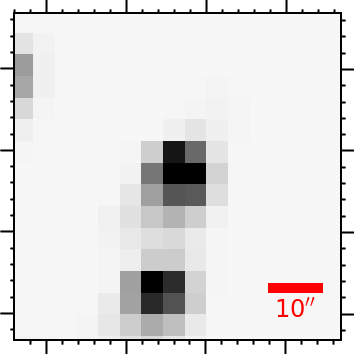

In [28]:
%%time
make_postage_stamp(im_in, output, hdu=13, vmin=0, vmax=8000)

In [30]:
! open S1063_60x60arcsec_*